In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "\Users\Ashish\Documents\Loan Prediction"

C:\Users\Ashish\Documents\Loan Prediction


In [3]:
loantrain=pd.read_csv("train.csv")

In [4]:
loantest=pd.read_csv("test.csv")

In [5]:
loantrain.shape

(614, 13)

In [6]:
loantest.shape

(367, 12)

In [7]:
loantrain.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
loantest.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
loantrain.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [10]:
loantest.isnull().sum().sort_values()

Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
LoanAmount            5
Loan_Amount_Term      6
Dependents           10
Gender               11
Self_Employed        23
Credit_History       29
dtype: int64

In [11]:
loantrain.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
loantest.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
loantrain[['Loan_Amount_Term','LoanAmount','Credit_History']].describe()

,Loan_Amount_Term,LoanAmount,Credit_History
count,600.00000,592.000000,564.000000
mean,342.00000,146.412162,0.842199
std,65.12041,85.587325,0.364878
min,12.00000,9.000000,0.000000
25%,360.00000,100.000000,1.000000
50%,360.00000,128.000000,1.000000
75%,360.00000,168.000000,1.000000
max,480.00000,700.000000,1.000000


In [14]:
loantrain['Loan_Amount_Term']=loantrain['Loan_Amount_Term'].fillna(loantrain['Loan_Amount_Term'].mean())

In [15]:
loantrain['LoanAmount']=loantrain['LoanAmount'].fillna(loantrain['LoanAmount'].median())
loantrain['Credit_History']=loantrain['Credit_History'].fillna(loantrain['Credit_History'].mean())

In [16]:
loantrain[['Married','Gender','Dependents','Self_Employed']].value_counts()

Married  Gender  Dependents  Self_Employed
Yes      Male    0           No               128
No       Male    0           No                89
Yes      Male    2           No                67
                 1           No                58
No       Female  0           No                50
Yes      Male    3+          No                35
         Female  0           No                17
         Male    2           Yes               16
No       Male    0           Yes               13
Yes      Male    0           Yes               12
                 1           Yes               11
No       Female  1           No                 8
                 0           Yes                8
         Male    1           No                 6
Yes      Male    3+          Yes                6
No       Male    2           No                 6
Yes      Female  1           No                 4
                 2           No                 4
No       Male    3+          No                 3
       

In [17]:
loantrain[['Self_Employed']].value_counts()

Self_Employed
No               500
Yes               82
dtype: int64

In [18]:
loantrain[['Married']].value_counts()

Married
Yes        398
No         213
dtype: int64

In [19]:
loantrain[['Gender']].value_counts()

Gender
Male      489
Female    112
dtype: int64

In [20]:
loantrain[['Dependents']].value_counts()

Dependents
0             345
1             102
2             101
3+             51
dtype: int64

In [21]:
loantrain['Self_Employed']=loantrain['Self_Employed'].fillna('NA')

In [22]:
loantrain['Married']=loantrain['Married'].fillna('No')

In [23]:
loantrain['Gender']=loantrain['Gender'].fillna('NA')

In [24]:
loantrain['Dependents']=loantrain['Dependents'].fillna('NA')

In [25]:
loantest[['Loan_Amount_Term','LoanAmount','Credit_History']].describe()

,Loan_Amount_Term,LoanAmount,Credit_History
count,361.000000,362.000000,338.000000
mean,342.537396,136.132597,0.825444
std,65.156643,61.366652,0.380150
min,6.000000,28.000000,0.000000
25%,360.000000,100.250000,1.000000
50%,360.000000,125.000000,1.000000
75%,360.000000,158.000000,1.000000
max,480.000000,550.000000,1.000000


In [26]:
loantest['LoanAmount']=loantest['LoanAmount'].fillna(loantest['LoanAmount'].median())
loantest['Loan_Amount_Term']=loantest['Loan_Amount_Term'].fillna(loantest['Loan_Amount_Term'].mean())
loantest['Credit_History']=loantest['Credit_History'].fillna(loantest['Credit_History'].mean())

In [27]:
loantest['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [28]:
loantest['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [29]:
loantest['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [30]:
loantest['Gender']=loantest['Gender'].fillna('NA')
loantest['Dependents']=loantest['Dependents'].fillna('NA')
loantest['Self_Employed']=loantest['Self_Employed'].fillna('NA')

In [31]:
loantest['Loan_Status']='test'

In [32]:
loantest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,test


In [33]:
combinedf=pd.concat([loantrain,loantest],axis=0)

In [34]:
combinedf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
combinedf.shape

(981, 13)

In [36]:
combinedf.isnull().sum().sort_values()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
numericcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=np.object)
print(numericcols.shape)
print(objectcols.shape)

(981, 5)
(981, 8)


In [38]:
numericcols.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [39]:
objectcols.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [40]:
numericcols.shape
objectcols.shape

(981, 8)

In [41]:
numericcols['Loan_Status']=objectcols.Loan_Status

<ipython-input-41-0498a6d99bbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols['Loan_Status']=objectcols.Loan_Status


In [42]:
objectcols=objectcols.drop('Loan_Status',axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
objectcolsdummy=objectcols.apply(le.fit_transform)

In [46]:
objectcolsdummy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,1,2
1,1,1,1,1,0,1,0
2,2,1,1,0,0,2,2
3,3,1,1,0,1,1,2
4,4,1,0,0,0,1,2


In [47]:
combinedfclean=pd.concat([numericcols,objectcolsdummy],axis=1)

In [48]:
combinedfclean.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849,0.0,128.0,360.0,1.0,Y,0,1,0,0,0,1,2
1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,Y,2,1,1,0,0,2,2
3,2583,2358.0,120.0,360.0,1.0,Y,3,1,1,0,1,1,2
4,6000,0.0,141.0,360.0,1.0,Y,4,1,0,0,0,1,2


In [49]:
combinedfclean.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
362,4009,1777.0,113.0,360.0,1.000000,test,970,1,1,3,1,2,2
363,4158,709.0,115.0,360.0,1.000000,test,972,1,1,0,0,1,2
364,3250,1993.0,126.0,360.0,0.825444,test,975,1,0,0,0,1,1
365,5000,2393.0,158.0,360.0,1.000000,test,978,1,1,0,0,1,0
366,9200,0.0,98.0,180.0,1.000000,test,979,1,0,0,0,2,0


In [50]:
combinedfclean.shape

(981, 13)

In [51]:
loantestdf=combinedfclean[combinedfclean.Loan_Status=='test']
loantraindf=combinedfclean[combinedfclean.Loan_Status!='test']

In [52]:
loantestdf=loantestdf.drop('Loan_Status',axis=1)

In [53]:
print(loantestdf.shape)
print(loantraindf.shape)

(367, 12)
(614, 13)


In [54]:
loantraindf.shape

(614, 13)

In [55]:
loantestdf.shape

(367, 12)

In [56]:
loantest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,test


In [57]:
loantrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
y=loantraindf.Loan_Status
X=loantraindf.drop('Loan_Status',axis=1)

In [59]:
y=y.astype('object')

In [60]:
X.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477,0.018489,0.094472,0.050194,0.103416,-0.140760,0.092967,-0.009500
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665,0.040069,0.073308,0.080496,0.011146,-0.062290,-0.052384,0.010522
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031,0.038066,0.135505,0.145717,0.128868,-0.168759,0.082048,-0.046632
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395,-0.029797,-0.067778,-0.103400,-0.073683,-0.077242,-0.017594,-0.077620
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000,-0.032058,-0.000490,0.001212,-0.077539,-0.077936,-0.035999,-0.001880
Loan_ID,0.018489,0.040069,0.038066,-0.029797,-0.032058,1.000000,-0.005701,-0.012129,0.055718,0.038072,0.037682,-0.157355
Gender,0.094472,0.073308,0.135505,-0.067778,-0.000490,-0.005701,1.000000,0.349411,0.149674,0.024382,0.046235,-0.030903
Married,0.050194,0.080496,0.145717,-0.103400,0.001212,-0.012129,0.349411,1.000000,0.285968,0.017671,0.028934,0.000395
Dependents,0.103416,0.011146,0.128868,-0.073683,-0.077539,0.055718,0.149674,0.285968,1.000000,0.060466,0.058097,0.032600
Education,-0.140760,-0.062290,-0.168759,-0.077242,-0.077936,0.038072,0.024382,0.017671,0.060466,1.000000,0.000820,-0.065243


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression(max_iter=2000)

In [63]:
lrmodel=lr.fit(X,y)

In [64]:
lrmodel.score(X,y)

0.8127035830618893

In [96]:
lrmpredict=lrmodel.predict(X)

In [108]:
lrmpredict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [99]:
pd.crosstab(y,lrmpredict)

col_0,N,Y
Loan_Status,,
N,85,107
Y,8,414


In [100]:
from sklearn.metrics import classification_report

In [101]:
print( classification_report(y,lrmpredict))

              precision    recall  f1-score   support

           N       0.91      0.44      0.60       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



In [102]:
lrmodel.intercept_

array([0.0657886])

In [103]:
lrmodel.coef_

array([[ 3.80696169e-07, -6.00579298e-05, -2.04309901e-03,
        -4.57910308e-03,  3.06827484e+00,  1.51098698e-04,
        -6.47195411e-03,  5.47969136e-01,  1.78564695e-02,
        -5.14115639e-01, -5.24210997e-02, -5.29738084e-02]])

In [104]:
coefs=pd.DataFrame(lrmodel.coef_,columns=X.columns)

In [106]:
coefs.transpose()

,0
ApplicantIncome,3.806962e-07
CoapplicantIncome,-6.005793e-05
LoanAmount,-2.043099e-03
Loan_Amount_Term,-4.579103e-03
Credit_History,3.068275e+00
Loan_ID,1.510987e-04
Gender,-6.471954e-03
Married,5.479691e-01
Dependents,1.785647e-02
Education,-5.141156e-01


In [65]:
from sklearn.metrics import plot_roc_curve

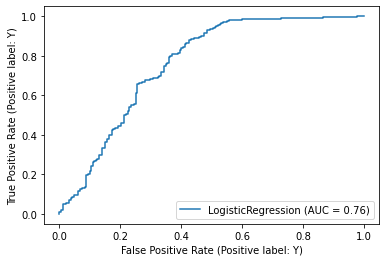

In [66]:
plot_roc_curve(lr,X,y)

In [67]:
from sklearn.pipeline import make_pipeline

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
from sklearn.svm import SVC

In [70]:
clf=make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [71]:
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [72]:
clf.score(X,y)

0.8257328990228013

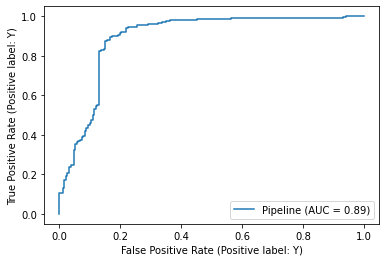

In [73]:
plot_roc_curve(clf,X,y)

In [74]:
testpredict=clf.predict(loantestdf)

In [75]:
pd.DataFrame(testpredict).to_csv('loanpredict.csv')

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
from sklearn.pipeline import Pipeline

In [79]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])

In [80]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

In [81]:
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 120, verbose=True, n_jobs=-1)


In [82]:
best_clf = clf.fit(X,y)

Fitting 120 folds for each of 100 candidates, totalling 12000 fits


C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.68777778 0.68944444 0.68777778 0.68944444 0.68777778 0.68944444
 0.68777778 0.68944444 0.68944444 0.68944444 0.68944444 0.68916667
 0.80916667 0.77277778 0.80916667 0.80583333 0.80916667 0.8075
 0.80916667 0.8075     0.80916667 0.8075     0.80916667 0.80916667
 0.80916667 0.80916667 0.80916667 0.8075     0.80916667 0.80916667
 0.80916667 0.80916667 0.80916667 0.8075     0.80916667 0.8075
 0.80916667 0.81083333 0.80916667 0.81083333 0.75861111 0.78666667
 0.78194444 0.79361111 0.78388889 0.77916667 0.78527778 0.79388889
 0.79194444 0.78527778 0.75861111 0.78222222 0.78833333 0.78111111
 0.79166667 0.78305556 0.78638889 0.78027778 0.78333333 0.78166667
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan     

In [83]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features=10)

In [84]:
test_predict=best_clf.predict(loantestdf)

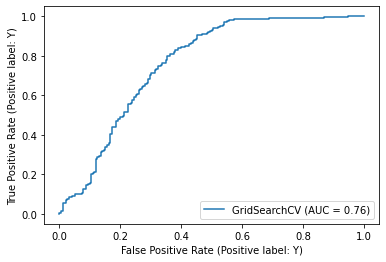

In [85]:
plot_roc_curve(best_clf,X,y)

In [86]:
best_clf.score(X,y)

0.8127035830618893